In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
% matplotlib inline

/home/am/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class MLP:
    def __init__(self,n_input=2,n_hidden=4, n_output=1, act_func=[tf.nn.elu, tf.sigmoid], learning_rate= 0.001):
        self.n_input = n_input # Number of inputs to the neuron
        self.act_fn = act_func
        seed = 123
        
        self.X = tf.placeholder(tf.float32, name='X', shape=[None,n_input])
        self.y = tf.placeholder(tf.float32, name='Y')
                
        # Build the graph for a single neuron
        # Hidden layer
        self.W1 = tf.Variable(tf.random_normal([n_input,n_hidden], stddev=2, seed = seed), name = "weights")
        self.b1 = tf.Variable(tf.random_normal([1, n_hidden], seed = seed), name="bias")
        tf.summary.histogram("Weights_Layer_1",self.W1)
        tf.summary.histogram("Bias_Layer_1", self.b1)
        
        
        # Output Layer
        self.W2 = tf.Variable(tf.random_normal([n_hidden,n_output], stddev=2, seed = 0), name = "weights")
        self.b2 = tf.Variable(tf.random_normal([1, n_output], seed = seed), name="bias")
        tf.summary.histogram("Weights_Layer_2",self.W2)
        tf.summary.histogram("Bias_Layer_2", self.b2)
               
        
        activity = tf.matmul(self.X, self.W1) + self.b1
        h1 = self.act_fn[0](activity)
        
        activity = tf.matmul(h1, self.W2) + self.b2
        self.y_hat = self.act_fn[1](activity)
        
        
        error = self.y - self.y_hat
        
        self.loss = tf.reduce_mean(tf.square(error)) + 0.6*tf.nn.l2_loss(self.W1) #+ 0.6*tf.nn.l2_loss(self.W2)
        self.opt =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(self.loss)
        
        
        tf.summary.scalar("loss",self.loss)
        init = tf.global_variables_initializer()
        
        self.sess = tf.Session()
        self.sess.run(init)
        
        self.merge = tf.summary.merge_all()
        self.writer = tf.summary.FileWriter("logs/", graph=tf.get_default_graph())
        
        
        
    def train(self, X, Y, X_val, Y_val, epochs=100):
        epoch = 0
        X, Y = shuffle(X,Y)
        loss = []
        loss_val = []
        while epoch < epochs:
            # Run the optimizer for the whole training set batch wise (Stochastic Gradient Descent)    
            merge, _, l = self.sess.run([self.merge,self.opt,self.loss], feed_dict={self.X: X, self.y: Y})
            l_val = self.sess.run(self.loss, feed_dict={self.X: X_val, self.y: Y_val})
            
            loss.append(l)
            loss_val.append(l_val)
            self.writer.add_summary(merge, epoch)
                
            if epoch % 10 == 0:
                print("Epoch {}/{}  training loss: {} Validation loss {}".\
                      format(epoch,epochs,l, l_val ))
                
               
            epoch += 1
        return loss, loss_val
            
    def predict(self, X):
        return self.sess.run(self.y_hat, feed_dict={self.X: X})

In [3]:
filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_val, Y_train, y_val = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [4]:
_, d = X_train.shape
_, n = Y_train.shape
model = MLP(n_input=d, n_hidden=15, n_output=n)

In [5]:
loss, loss_val = model.train(X_train, Y_train, X_val, y_val, 6000)

Epoch 0/6000  training loss: 108.84590911865234 Validation loss 108.71923828125
Epoch 10/6000  training loss: 107.54991912841797 Validation loss 107.42478942871094
Epoch 20/6000  training loss: 106.2693862915039 Validation loss 106.14578247070312
Epoch 30/6000  training loss: 105.00411224365234 Validation loss 104.88204193115234
Epoch 40/6000  training loss: 103.75394439697266 Validation loss 103.63336181640625
Epoch 50/6000  training loss: 102.51868438720703 Validation loss 102.39956665039062
Epoch 60/6000  training loss: 101.29817199707031 Validation loss 101.18049621582031
Epoch 70/6000  training loss: 100.09220886230469 Validation loss 99.97598266601562
Epoch 80/6000  training loss: 98.90062713623047 Validation loss 98.78582763671875
Epoch 90/6000  training loss: 97.72327423095703 Validation loss 97.60987091064453
Epoch 100/6000  training loss: 96.55992889404297 Validation loss 96.44790649414062
Epoch 110/6000  training loss: 95.41049194335938 Validation loss 95.29981994628906
Epoc

Epoch 1050/6000  training loss: 30.990524291992188 Validation loss 30.954809188842773
Epoch 1060/6000  training loss: 30.6219539642334 Validation loss 30.586654663085938
Epoch 1070/6000  training loss: 30.257740020751953 Validation loss 30.22284698486328
Epoch 1080/6000  training loss: 29.8978271484375 Validation loss 29.863338470458984
Epoch 1090/6000  training loss: 29.542156219482422 Validation loss 29.50806427001953
Epoch 1100/6000  training loss: 29.19068145751953 Validation loss 29.156984329223633
Epoch 1110/6000  training loss: 28.843345642089844 Validation loss 28.810035705566406
Epoch 1120/6000  training loss: 28.500099182128906 Validation loss 28.467172622680664
Epoch 1130/6000  training loss: 28.160898208618164 Validation loss 28.12834930419922
Epoch 1140/6000  training loss: 27.82568359375 Validation loss 27.79351043701172
Epoch 1150/6000  training loss: 27.49441146850586 Validation loss 27.462610244750977
Epoch 1160/6000  training loss: 27.16703224182129 Validation loss 27

Epoch 2090/6000  training loss: 8.871855735778809 Validation loss 8.862602233886719
Epoch 2100/6000  training loss: 8.76603889465332 Validation loss 8.756905555725098
Epoch 2110/6000  training loss: 8.66148567199707 Validation loss 8.652469635009766
Epoch 2120/6000  training loss: 8.558177947998047 Validation loss 8.549278259277344
Epoch 2130/6000  training loss: 8.456101417541504 Validation loss 8.447317123413086
Epoch 2140/6000  training loss: 8.355242729187012 Validation loss 8.346571922302246
Epoch 2150/6000  training loss: 8.255585670471191 Validation loss 8.247027397155762
Epoch 2160/6000  training loss: 8.157116889953613 Validation loss 8.148667335510254
Epoch 2170/6000  training loss: 8.059823036193848 Validation loss 8.051482200622559
Epoch 2180/6000  training loss: 7.963688850402832 Validation loss 7.955456256866455
Epoch 2190/6000  training loss: 7.8687005043029785 Validation loss 7.860574245452881
Epoch 2200/6000  training loss: 7.774844169616699 Validation loss 7.766822814

Epoch 3110/6000  training loss: 2.610234022140503 Validation loss 2.607834577560425
Epoch 3120/6000  training loss: 2.5791757106781006 Validation loss 2.5768089294433594
Epoch 3130/6000  training loss: 2.5484893321990967 Validation loss 2.5461552143096924
Epoch 3140/6000  training loss: 2.5181713104248047 Validation loss 2.515868902206421
Epoch 3150/6000  training loss: 2.4882168769836426 Validation loss 2.485945463180542
Epoch 3160/6000  training loss: 2.4586215019226074 Validation loss 2.4563815593719482
Epoch 3170/6000  training loss: 2.4293811321258545 Validation loss 2.427171468734741
Epoch 3180/6000  training loss: 2.400491237640381 Validation loss 2.3983120918273926
Epoch 3190/6000  training loss: 2.371948003768921 Validation loss 2.3697986602783203
Epoch 3200/6000  training loss: 2.34374737739563 Validation loss 2.341627359390259
Epoch 3210/6000  training loss: 2.315884590148926 Validation loss 2.3137943744659424
Epoch 3220/6000  training loss: 2.2883570194244385 Validation los

Epoch 4120/6000  training loss: 0.7876584529876709 Validation loss 0.7871440052986145
Epoch 4130/6000  training loss: 0.7785079479217529 Validation loss 0.7780027389526367
Epoch 4140/6000  training loss: 0.7694676518440247 Validation loss 0.7689716815948486
Epoch 4150/6000  training loss: 0.7605364322662354 Validation loss 0.7600495219230652
Epoch 4160/6000  training loss: 0.7517127394676208 Validation loss 0.7512346506118774
Epoch 4170/6000  training loss: 0.7429953217506409 Validation loss 0.7425262331962585
Epoch 4180/6000  training loss: 0.7343831062316895 Validation loss 0.7339227199554443
Epoch 4190/6000  training loss: 0.7258746027946472 Validation loss 0.7254228591918945
Epoch 4200/6000  training loss: 0.7174686789512634 Validation loss 0.7170254588127136
Epoch 4210/6000  training loss: 0.709164023399353 Validation loss 0.7087292671203613
Epoch 4220/6000  training loss: 0.7009595632553101 Validation loss 0.7005330324172974
Epoch 4230/6000  training loss: 0.6928539276123047 Vali

Epoch 5150/6000  training loss: 0.246184304356575 Validation loss 0.24621278047561646
Epoch 5160/6000  training loss: 0.24355940520763397 Validation loss 0.24359044432640076
Epoch 5170/6000  training loss: 0.2409660816192627 Validation loss 0.24099963903427124
Epoch 5180/6000  training loss: 0.2384040355682373 Validation loss 0.23844009637832642
Epoch 5190/6000  training loss: 0.2358728051185608 Validation loss 0.2359113246202469
Epoch 5200/6000  training loss: 0.23337207734584808 Validation loss 0.23341301083564758
Epoch 5210/6000  training loss: 0.23090146481990814 Validation loss 0.23094481229782104
Epoch 5220/6000  training loss: 0.22846056520938873 Validation loss 0.22850629687309265
Epoch 5230/6000  training loss: 0.22604911029338837 Validation loss 0.22609715163707733
Epoch 5240/6000  training loss: 0.22366668283939362 Validation loss 0.22371704876422882
Epoch 5250/6000  training loss: 0.22131291031837463 Validation loss 0.2213655561208725
Epoch 5260/6000  training loss: 0.21898

Text(0,0.5,'Mean Square Error')

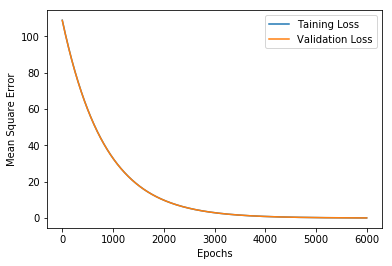

In [6]:
plt.plot(loss, label="Taining Loss")
plt.plot(loss_val, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")

In [7]:
Y_pred = model.predict(np.float32(X_val))

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score is {} and MSE {}".format(\
       r2_score(y_val, Y_pred),\
       mean_squared_error(y_val, Y_pred)))

R2 Score is 0.6767650953865371 and MSE 0.016636404989961568
